# Projekt IAU  
## 1. časť - Prieskumná analýza 
### Vypracovali: Martin Kukučka, Martin Jankuliak

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import glob

import datetime
from datetime import datetime,date
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import json
import re
import dateutil.parser as parser
import statsmodels.api as sm

import scipy as sc
from pandas import read_csv


### Načítanie dát

In [75]:
df_other_train = read_csv("data/other_train.csv")
df_personal_train = read_csv("data/personal_train.csv")

## Základný opis dát spolu s ich charakteristikami 

### Dataset other_train.csv

Pre predstavu tu je ukážka datasetu

In [76]:
df_other_train.head()

,Unnamed: 0,name,address,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,education,fnlwgt,class,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,0,Robert Plante,"3594 Johnson Green Suite 277\r\nJohnsonport, V...",White,Widowed,Other-service,f,5.0,Unmarried,0.0,9th,220019.0,1.0,<=50K,"{'mean_glucose':'106.71875','std_glucose':'48....",United-States,9.0,0.0,Private
1,1,Richard Huey,"350 Lewis Haven\r\nAngelaton, IN 39486",Asian-Pac-Islander,Never-married,Handlers-cleaners,f,13.0,Not-in-family,0.0,Bachelors,196899.0,0.0,<=50K,"{'mean_glucose':'118.609375','std_glucose':'na...",Haiti,50.0,0.0,Private
2,2,Joseph Sable,22509 Adrian Canyon Suite 799\r\nEast Timothyt...,White,Never-married,Exec-managerial,f,9.0,Unmarried,0.0,HS-grad,301591.0,0.0,<=50K,"{'mean_glucose':'129.4609375','std_glucose':'5...",United-States,35.0,0.0,Private
3,3,Gregory Preston,"2674 Daryl Island\r\nLake Sean, TN 89363",White,Married-civ-spouse,Exec-managerial,f,13.0,Husband,0.0,Bachelors,310320.0,1.0,>50K,"{'mean_glucose':'30.1015625','std_glucose':'37...",United-States,40.0,0.0,Private
4,4,Mike Riley,023 Joseph Estate Suite 799\r\nLake Andrewvill...,White,Married-civ-spouse,Handlers-cleaners,f,9.0,Husband,0.0,HS-grad,237943.0,0.0,<=50K,"{'mean_glucose':'124.0390625','std_glucose':'4...",United-States,60.0,0.0,private


Pomocou tohto príkazu zistíme počet riadkov

In [77]:
df_other_train.shape[0]

3983

A teraz počet atribútov pre tento dataset

In [78]:
df_other_train.shape[1]

19

Typy atribútov zistíme týmto príkazom

In [79]:
df_other_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3983 non-null   int64  
 1   name            3983 non-null   object 
 2   address         3983 non-null   object 
 3   race            3691 non-null   object 
 4   marital-status  3970 non-null   object 
 5   occupation      3961 non-null   object 
 6   pregnant        3969 non-null   object 
 7   education-num   3961 non-null   float64
 8   relationship    3954 non-null   object 
 9   capital-gain    3969 non-null   float64
 10  education       3972 non-null   object 
 11  fnlwgt          3968 non-null   float64
 12  class           3960 non-null   float64
 13  income          3972 non-null   object 
 14  medical_info    3966 non-null   object 
 15  native-country  3966 non-null   object 
 16  hours-per-week  3966 non-null   float64
 17  capital-loss    3973 non-null   f

Zistili sme, že tento dataset je zložený z atribútov:
- 6x float
- 1x int
- 12x object

Ďalej tu vidíme aj počet riadkov: 3983 ("RangeIndex: 3983 entries"),
a počet stĺpcov: 19 ("Data columns (total 19 columns)")

Nakoniec sa pozrieme na desktiptívne štatistiky.

In [80]:
df_other_train.describe()

,Unnamed: 0,education-num,capital-gain,fnlwgt,class,hours-per-week,capital-loss
count,3983.00000,3961.000000,3969.000000,3968.000000,3960.000000,3966.000000,3973.000000
mean,1991.00000,10.052764,1134.530108,189963.996976,0.256313,40.203984,72.926252
std,1149.93739,2.520019,8067.028170,102327.438172,0.436652,12.317838,360.910859
min,0.00000,1.000000,0.000000,20308.000000,0.000000,1.000000,0.000000
25%,995.50000,9.000000,0.000000,119475.250000,0.000000,40.000000,0.000000
50%,1991.00000,10.000000,0.000000,180585.500000,0.000000,40.000000,0.000000
75%,2986.50000,12.000000,0.000000,236173.000000,1.000000,45.000000,0.000000
max,3982.00000,16.000000,99999.000000,795830.000000,1.000000,99.000000,2824.000000


V tejto tabuľke vidíme štatistiky ako sú: počet záznamov (nenulových), priemer, štandardnú odchýlku, minimum, prvý kvartil, druhý kvartil (medián), tretí kvartil, maximum, pre všetky atribúty, ktoré obsahujú numerické hodnoty.

### Dataset personal_train.csv

Rovnako vykonáme opis dát aj pre druhý dataset

Ukážka datasetu

In [81]:
df_personal_train.head()

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Male,1961-04-27
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",43,Female,1976-09-12
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",51,Male,1967-11-12
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",66,Male,1953-06-02
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",45,Female,1974/09/11


Počet riadkov

In [82]:
df_personal_train.shape[0]

3933

Počet atribútov

In [83]:
df_personal_train.shape[1]

6

Typy atribútov

In [84]:
df_personal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3933 non-null   int64 
 1   name           3933 non-null   object
 2   address        3933 non-null   object
 3   age            3933 non-null   int64 
 4   sex            3933 non-null   object
 5   date_of_birth  3933 non-null   object
dtypes: int64(2), object(4)
memory usage: 184.5+ KB


Zistile sme, že tento dataset je zložený z atribútov:
- 2x int
- 4x object

Ďalej tu vidíme aj počet riadkov: 3933 ("RangeIndex: 3933 entries"),
a počet stĺpcov: 6 ("Data columns (total 6 columns)")

A Nakoniec desktiptívne štatistiky.

In [85]:
df_personal_train.describe()

,Unnamed: 0,age
count,3933.000000,3933.000000
mean,1966.000000,51.816934
std,1135.503633,11.814803
min,0.000000,-1.000000
25%,983.000000,44.000000
50%,1966.000000,52.000000
75%,2949.000000,60.000000
max,3932.000000,113.000000


## Párová analýza dát

Nacitanie datasetov a nahradenie pomlciek podtrznikmi a premenovanie class na Pclass a vymazanie stlpca Unnamed: 0

In [86]:
df_other_train_analysis = read_csv("data/other_train.csv")
df_personal_train_analysis = read_csv("data/personal_train.csv")

df_other_train_analysis.columns = df_other_train_analysis.columns.str.replace('-','_')
df_personal_train_analysis.columns = df_personal_train_analysis.columns.str.replace('-','_')

df_other_train_analysis.rename(columns = {'class':'Pclass'}, inplace = True)
df_other_train_analysis = df_other_train_analysis.drop(columns=['Unnamed: 0'])

Nacitanie hodnot zo stlpca medical_info do osobitneho data setu

In [87]:
data_frame = {}
med_inf = df_other_train_analysis.medical_info
med_inf = med_inf.str.replace("'", '"').tolist()
data_keys = json.loads(med_inf[0]).keys()

for data_key in data_keys:
    data_frame[data_key] = []

for data in med_inf:
    if isinstance(data, str):
        values = json.loads(data)
        for data_key in data_keys:
            data_frame[data_key].append(values[data_key])
    else:
        for data_key in data_keys:
            data_frame[data_key].append(np.NaN)

Zobrazenie prvych riadkov z noveho data setu

In [88]:
data_frame = pd.DataFrame(data_frame)
data_frame.head()

,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,106.71875,48.59991922,0.48313819,0.060911664,6.269230769,29.92992523,6.026227617999999,38.46886389
1,118.609375,nan,0.386486255,-0.391453476,6.880434782999999,31.45280882,4.726094845,22.1326697
2,129.4609375,51.84771908,0.097801521,-0.17631789,1.074414716,12.3100408,14.03786226,224.8662321
3,30.1015625,37.99585501,4.505472298,20.78517939,75.45234114,78.74218273,0.894009245,-0.437248907
4,124.0390625,46.68133365,0.113198941,0.403242952,5.68812709,26.33443057,5.662103534,35.99633243


Spojenie noveho data setu s povodnym a vymazanie stlpca medical_info

In [89]:
data_frame = pd.concat([df_other_train_analysis, data_frame.reindex(df_other_train_analysis.index)], axis=1)
data_frame = data_frame.drop(columns=['medical_info'])

Hodnoty, ktore su typu object pretypujeme na float

In [90]:
data_frame.mean_glucose = data_frame.mean_glucose.astype(float)
data_frame.std_glucose = data_frame.std_glucose.astype(float)
data_frame.kurtosis_glucose = data_frame.kurtosis_glucose.astype(float)
data_frame.skewness_glucose = data_frame.skewness_glucose.astype(float)
data_frame.mean_oxygen = data_frame.mean_oxygen.astype(float)
data_frame.std_oxygen = data_frame.std_oxygen.astype(float)
data_frame.kurtosis_oxygen = data_frame.kurtosis_oxygen.astype(float)
data_frame.skewness_oxygen = data_frame.skewness_oxygen.astype(float)

Zobrazenie korelacie medzi jednotlivymi stlpcami

In [91]:
data_frame.corr()

,education_num,capital_gain,fnlwgt,Pclass,hours_per_week,capital_loss,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
education_num,1.000000,0.123889,-0.021473,-0.016022,0.145341,0.073644,0.010980,-0.003644,-0.002776,0.003668,-0.033308,-0.015143,0.002141,-0.013038
capital_gain,0.123889,1.000000,-0.004133,-0.004884,0.062525,-0.028330,0.013889,-0.017045,-0.013238,-0.011348,-0.010286,-0.002061,-0.003900,-0.010917
fnlwgt,-0.021473,-0.004133,1.000000,-0.008495,-0.019431,0.001739,0.021942,-0.046924,-0.016319,-0.017772,-0.000699,0.006683,-0.020806,-0.026493
Pclass,-0.016022,-0.004884,-0.008495,1.000000,-0.018250,0.014470,-0.774796,0.012411,0.788009,0.680492,0.517517,0.649252,-0.557858,-0.392099
hours_per_week,0.145341,0.062525,-0.019431,-0.018250,1.000000,0.062131,-0.000500,0.025705,0.004497,0.006531,0.000154,0.012247,-0.011479,-0.009528
capital_loss,0.073644,-0.028330,0.001739,0.014470,0.062131,1.000000,-0.023089,0.003752,0.023071,0.022763,0.004634,0.013276,-0.019131,-0.018075
mean_glucose,0.010980,0.013889,0.021942,-0.774796,-0.000500,-0.023089,1.000000,-0.004324,-0.925903,-0.826277,-0.543524,-0.560976,0.474864,0.309581
std_glucose,-0.003644,-0.017045,-0.046924,0.012411,0.025705,0.003752,-0.004324,1.000000,0.007416,0.006021,-0.016831,0.007899,-0.012920,-0.015565
kurtosis_glucose,-0.002776,-0.013238,-0.016319,0.788009,0.004497,0.023071,-0.925903,0.007416,1.000000,0.961956,0.594013,0.619777,-0.529232,-0.347260
skewness_glucose,0.003668,-0.011348,-0.017772,0.680492,0.006531,0.022763,-0.826277,0.006021,0.961956,1.000000,0.548871,0.556852,-0.477737,-0.311959


Vizualizovane vztahy medzi datami

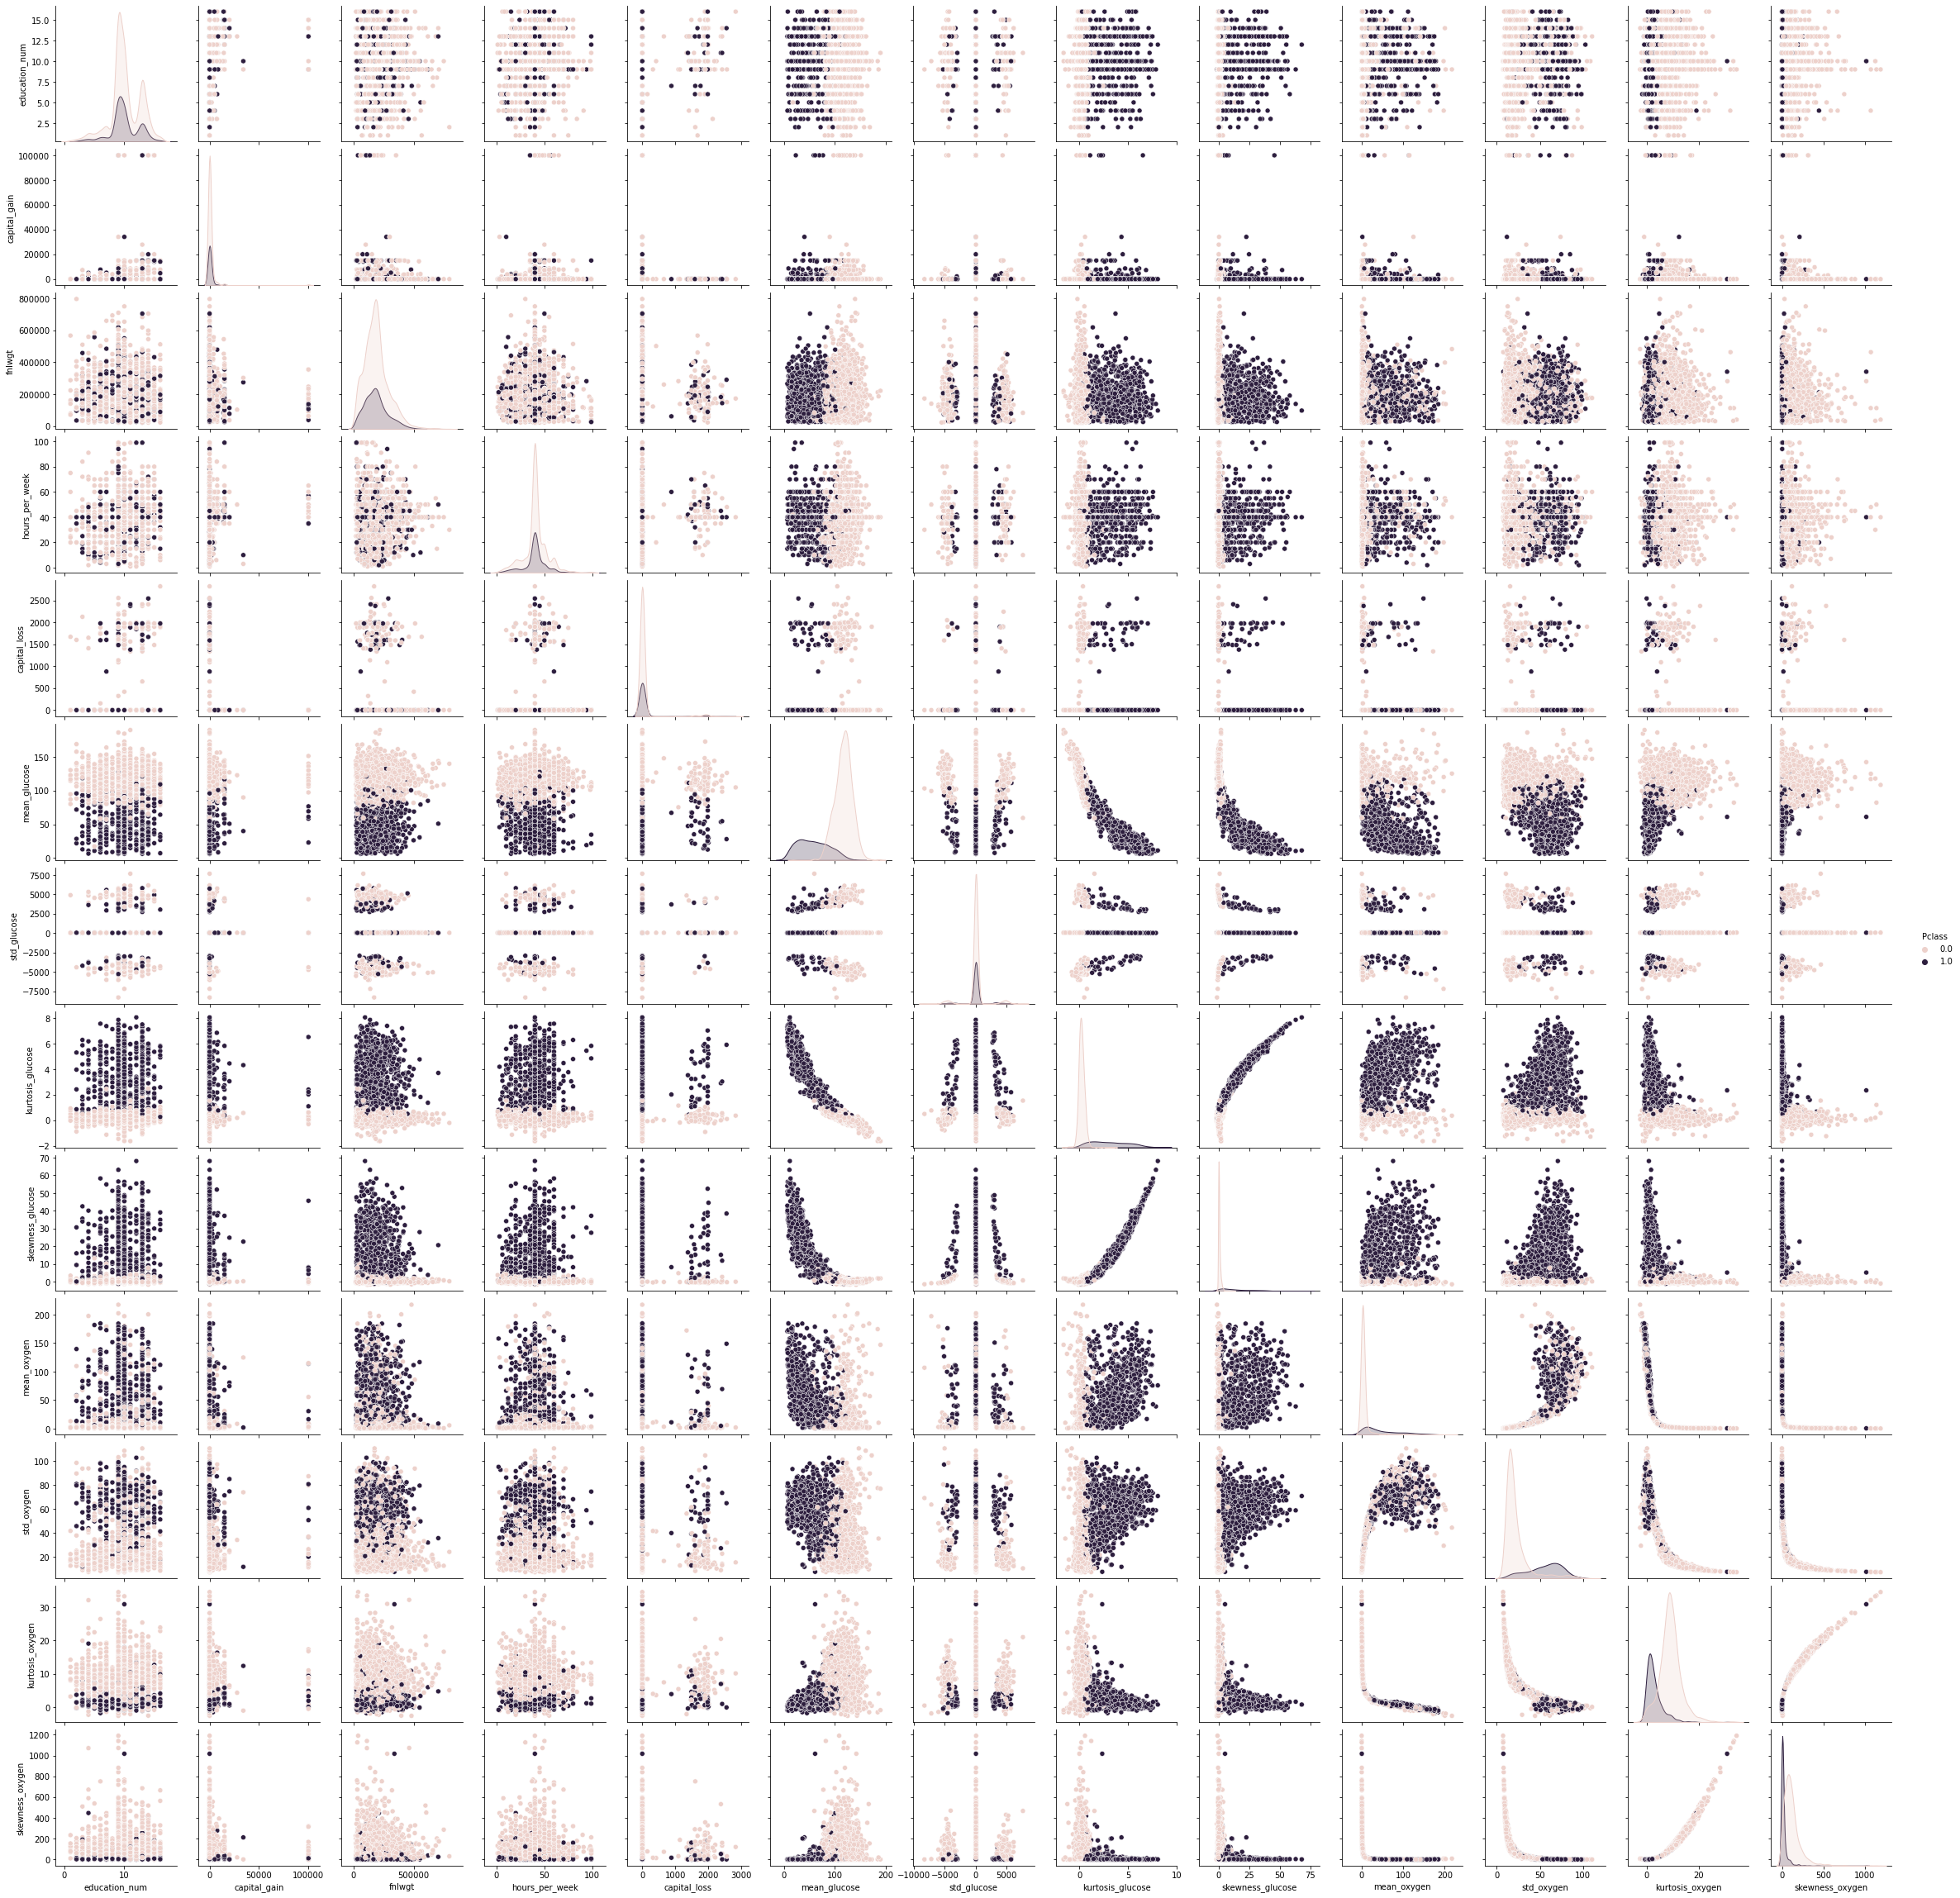

In [92]:
sns.pairplot(data_frame, hue="Pclass")

Tieto data by sa dali zobrazit na grafe jednej funkcie, cize vieme povedat, ze je medzi nimi zavislost

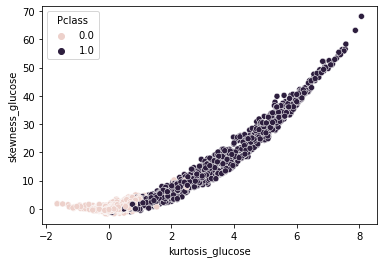

In [93]:
sns.scatterplot(x="kurtosis_glucose", y="skewness_glucose",hue="Pclass", data=data_frame)

Vypocitana Pearsonova korelacia, ktora je velmi vysoka cize tieto atributy su na sebe zavisle

Pearson correlation: 0.962


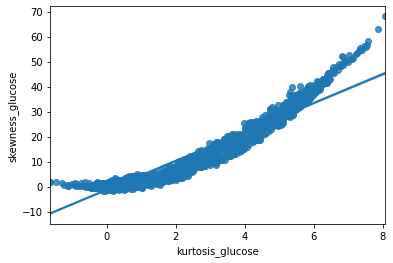

In [94]:
sns.regplot(x="kurtosis_glucose", y="skewness_glucose", data=data_frame)
print("Pearson correlation: %.3f" % data_frame.kurtosis_glucose.corr(data_frame.skewness_glucose))

Na boxplotoch nizsie je jasne vidno, ze chori ludia maju vyssie hodnoty kurtosis_glucose a skewness_glucose ako zdravi ludia

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


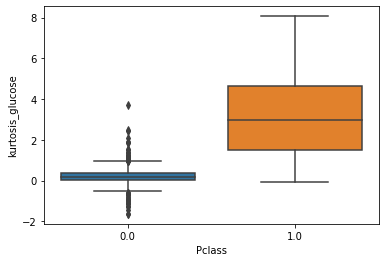

In [95]:
sns.boxplot('Pclass', 'kurtosis_glucose', data=data_frame)

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


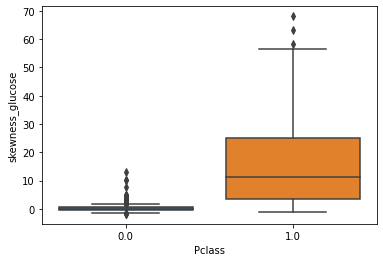

In [96]:
sns.boxplot('Pclass', 'skewness_glucose', data=data_frame)

Tieto data by sa tiez dali zobrazit na grafe jednej funkcie, cize vieme povedat, ze je medzi nimi zavislost

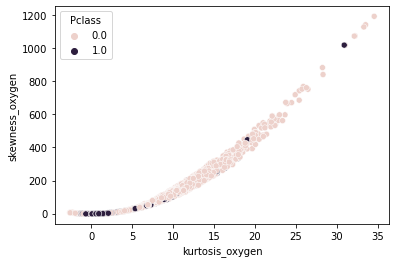

In [97]:
sns.scatterplot(x="kurtosis_oxygen", y="skewness_oxygen",hue="Pclass", data=data_frame)

Vypocitana Pearsonova korelacia, ktora je velmi vysoka cize tieto atributy su na sebe zavisle

Pearson correlation: 0.917


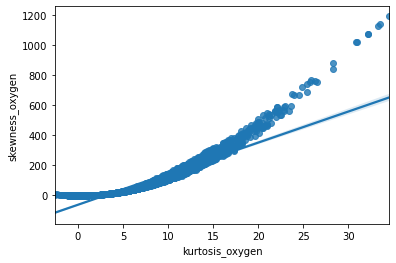

In [98]:
sns.regplot(x="kurtosis_oxygen", y="skewness_oxygen", data=data_frame)
print("Pearson correlation: %.3f" % data_frame.kurtosis_oxygen.corr(data_frame.skewness_oxygen))

Na boxplotoch nizsie je jasne vidno, ze chori ludia maju nizsie hodnoty kurtosis_oxygen a skewness_oxygen ako zdravi ludia

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


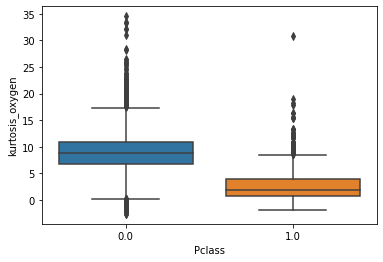

In [65]:
sns.boxplot('Pclass', 'kurtosis_oxygen', data=data_frame)

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


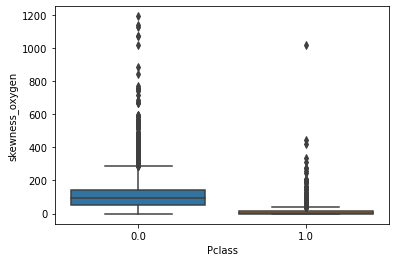

In [66]:
sns.boxplot('Pclass', 'skewness_oxygen', data=data_frame)

Tieto atributy pravdepodobne na sebe zavisle nebudu, ale mozme pozorovat rozdelenie na 2 zhluky, co bude tiez viest k nejakemu zaveru. Je vidiet, ze chori ludia maju vyssie hodnoty krutosis glucose a nizsie hodnoty skewness_oxygen.

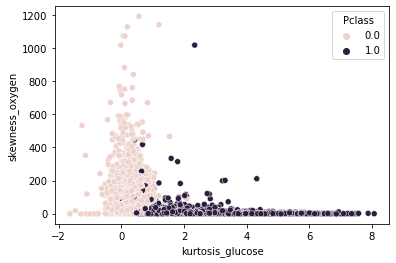

In [99]:
sns.scatterplot(x="kurtosis_glucose", y="skewness_oxygen",hue="Pclass", data=data_frame)

Je vidno, ze aj korelacia medzi tymito atributmi je slabsia

Pearson correlation: -0.347


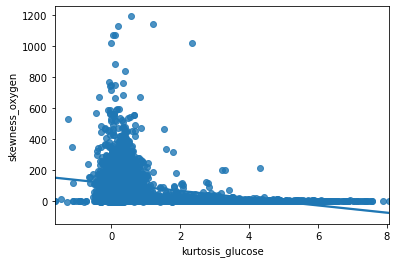

In [100]:
sns.regplot(x="kurtosis_glucose", y="skewness_oxygen", data=data_frame)
print("Pearson correlation: %.3f" % data_frame.kurtosis_glucose.corr(data_frame.skewness_oxygen))

Na boxplote je ale pekne vidno, ze je to pravda

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


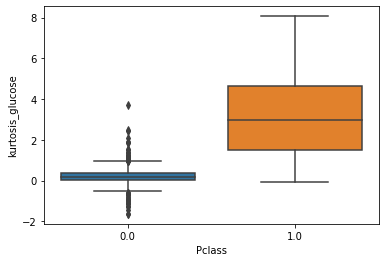

In [101]:
sns.boxplot('Pclass', 'kurtosis_glucose', data=data_frame)

Data, ktore su tu su velmi chaoticky rozhadzane a pravdepodobne nebudu mat ziadnu zavislost.

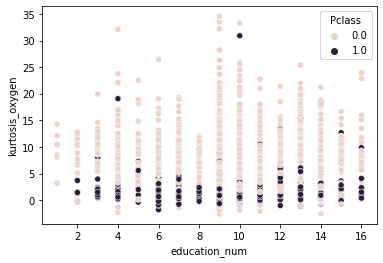

In [102]:
sns.scatterplot(x="education_num", y="kurtosis_oxygen",hue="Pclass", data=data_frame)

Podla korelacie vieme na isto povedat, ze atributy na sebe nezavisia.

Pearson correlation: 0.002


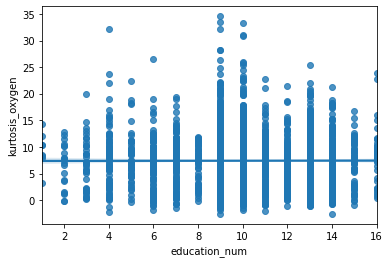

In [103]:
sns.regplot(x="education_num", y="kurtosis_oxygen", data=data_frame)
print("Pearson correlation: %.3f" % data_frame.education_num.corr(data_frame.kurtosis_oxygen))

Aj boxploty vyzeraju rovnako, cize nevieme z nich povedat jednoznacny zaver.

c:\users\matto\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


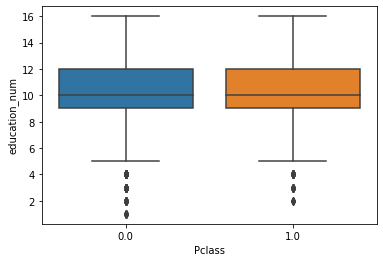

In [104]:
sns.boxplot('Pclass', 'education_num', data=data_frame)

Vykreslime si heatmapu, kde presne vidime podla farby, ktore atributy su zavisle

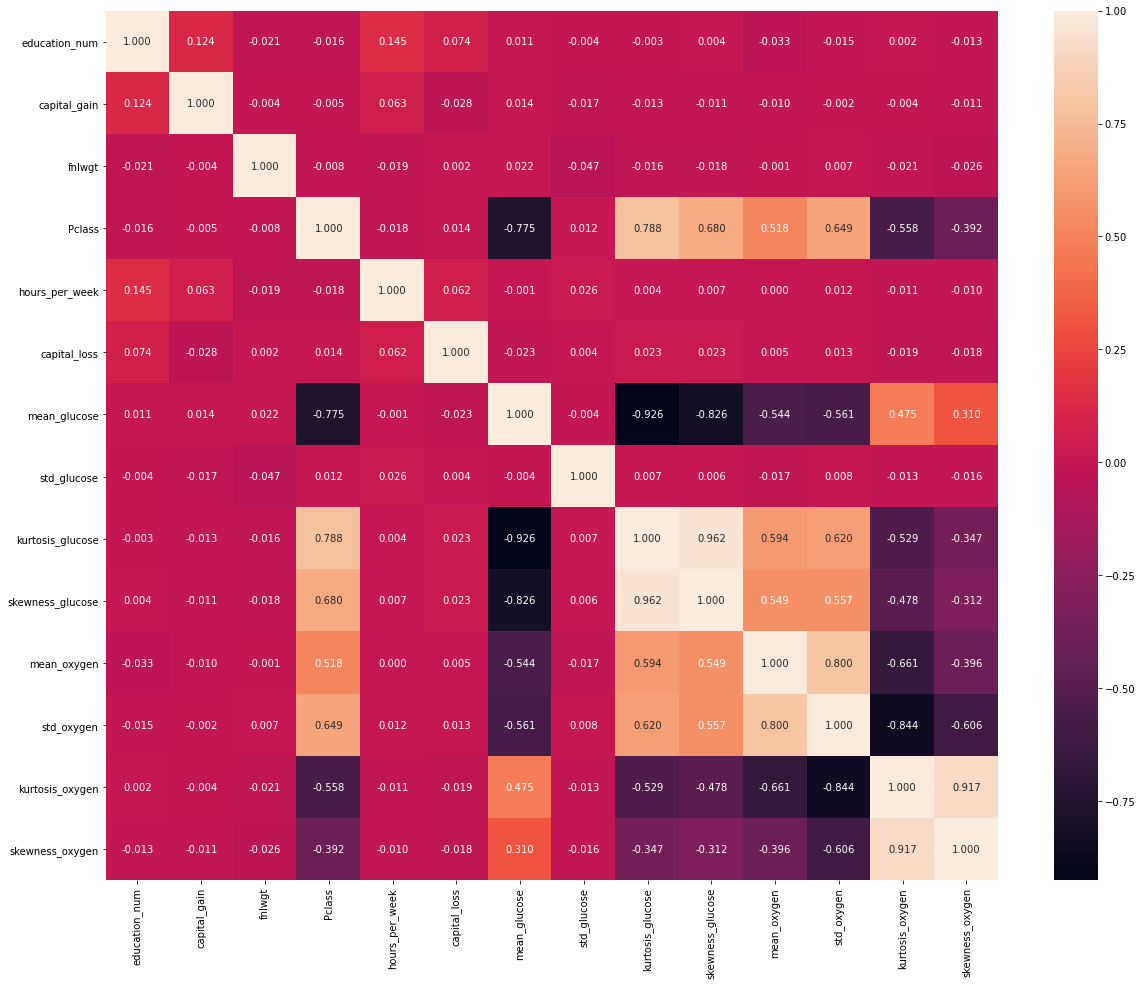

In [105]:
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(data_frame.corr(), ax=ax, annot=True, fmt=".3f")

Zobrazenie ludi s cukrovkou podla rasy

In [68]:
dia_race = pd.crosstab(index=data_frame["Pclass"], columns=data_frame["race"])
dia_race.index= ["0","1"]
dia_race

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,??
0,29,84,246,19,2272,94
1,9,30,75,11,776,31


In [69]:
dia_race_perc = pd.crosstab(index=data_frame["Pclass"], 
                                  columns=data_frame["race"],
                                  normalize='columns')
dia_race_perc.index= ["0","1"]
dia_race_perc

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,??
0,0.763158,0.736842,0.766355,0.633333,0.745407,0.752
1,0.236842,0.263158,0.233645,0.366667,0.254593,0.248


Zobrazenie ludi s cukrovkou podla zamestnania

In [106]:
dia_workclass = pd.crosstab(index=data_frame["Pclass"], columns=data_frame["workclass"])
dia_workclass.index= ["0","1"]
dia_workclass

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,?,federal-gov,local-gov,private,self-emp-inc,self-emp-not-inc,state-gov
0,145,67,158,1,1856,99,218,102,1,11,8,19,206,14,21,9
1,56,32,67,0,632,27,56,35,1,7,0,8,69,3,13,4


In [107]:
dia_workclass_perc = pd.crosstab(index=data_frame["Pclass"], 
                                  columns=data_frame["workclass"],
                                  normalize='columns')
dia_workclass_perc.index= ["0","1"]
dia_workclass_perc

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,?,federal-gov,local-gov,private,self-emp-inc,self-emp-not-inc,state-gov
0,0.721393,0.676768,0.702222,1.0,0.745981,0.785714,0.79562,0.744526,0.5,0.611111,1.0,0.703704,0.749091,0.823529,0.617647,0.692308
1,0.278607,0.323232,0.297778,0.0,0.254019,0.214286,0.20438,0.255474,0.5,0.388889,0.0,0.296296,0.250909,0.176471,0.382353,0.307692


## Formulácia a štatistické overenie hypotéz o dátach

## Identifikácia problémov v dátach spolu s predpokladaným scenárom riešenia v ďalšej fáze

Nevhodná štruktúra dát sa nachádza v atribúte medical_info v datasete other_train.csv, kde je atribút zložený z viacero zložiek (mean_glucose, std_glucose, kurtosis_glucose, skewness_glucose, mean_oxygen, std_oxygen, kurtosis_oxygen, skewness_oxygen), tento atribút chceme rozdeliť do viacero stĺpcov. Taktiež aj atribút address obsahuje viac zložiek, ale nepredpokladáme, že by hodnota Y významne závisela na tomto atribúte, preto počítame s tým, že tento atribút nebudeme podrobnejšie deliť.

In [24]:
df_other_train.shape[0] - df_personal_train.shape[0]

50

Zistili sme, že dataset other_train.csv obsahuje obsahuje o 50 záznamov viac ako personal_train. Predpokladáme, že v datasete other_train.csv sa budú nachádzať duplicitné záznamy.

In [14]:
df_other_train.duplicated().sum()

0

Duplicitné riadky sme nanašli, ale ešte nás zaujíma atribút name, pretože predpokladáme, že každý participant ma unikátne meno a nemáme viac záznamov daného človeka.

In [15]:
df_other_train.name.duplicated().sum()

50

Našli sme 50 duplicít, čo zodpovedá rozdielu záznamov medzi týmito datasetmi, vypíšeme si pár z nich.

In [9]:
df_other_train[df_other_train.name.isin(df_other_train.name[df_other_train.name.duplicated()])].sort_values(by=['name']).name.head(6)

2078    Alex Stubblefield
2682    Alex Stubblefield
2416         Ashley Lyons
467          Ashley Lyons
2553          Billy Clark
3408          Billy Clark
Name: name, dtype: object

Rovnaký postup zvolíme aj pre druhý dataset

In [17]:
df_personal_train.duplicated().sum()

0

In [18]:
df_personal_train.name.duplicated().sum()

0

Zistili sme, že v druhom datasete sa žiadne duplicity nenachádzajú.

Duplicitné záznamy chceme nahradiť len 1 záznamom a v prípade chýbajúcich hodnôt doplníme tieto hodnoty z druhého záznamu, ak budú existovať.

Teraz ideme nájsť nejednotné formáty dát. Budú nás zaujímať atribúty pregnant, workclass a z druhého datasetu age a date_of_birth.

In [73]:
df_other_train['pregnant'].unique()

array(['f', 'FALSE', 'F', 't', nan, 'TRUE', 'T'], dtype=object)

In [74]:
df_other_train['workclass'].unique()

array([' Private', 'private', ' Local-gov', ' State-gov', nan,
       ' Self-emp-inc', ' Self-emp-not-inc', 'state-gov', ' Federal-gov',
       ' ?', 'self-emp-not-inc', 'local-gov', 'federal-gov', '?',
       'self-emp-inc', ' Never-worked', ' Without-pay'], dtype=object)

In [75]:
age_formats = df_personal_train['age'].astype(str).str.replace('\d', '0')
age_formats.unique()

array(['00', '0', '000', '-0'], dtype=object)

In [76]:
date_formats = df_personal_train.date_of_birth
date_formats = date_formats.str.replace('\d', '0')
date_formats.unique()

array(['0000-00-00', '0000/00/00', '0000-00-00 00:00:00',
       '0000-00-00 00 00 00', '00/00/0000', '00-00-00'], dtype=object)

Nejednotné formáty dát sme našli. Formáty predstavujúce rovnakú hodnotu chceme zjednotiť na jeden tvar. V atribúte age vidíme záporné aj trojciferné hodnoty, tieto hodnoty zaradíme medzi vychýlené hodnoty a následne k ním vypočítame správnú hodnotu pomocou atribútu date_of_birth.

In [44]:
df_other_train.isnull().sum()

Unnamed: 0          0
name                0
address             0
race              292
marital-status     13
occupation         22
pregnant           14
education-num      22
relationship       29
capital-gain       14
education          11
fnlwgt             15
class              23
income             11
medical_info       17
native-country     17
hours-per-week     17
capital-loss       10
workclass          17
dtype: int64

Ako vidíme, chýbajú nám hodnoty v atribútoch 3-18, tieto hodnoty chceme doplniť mediánom alebo priemerom.

In [45]:
df_personal_train.isnull().sum()

Unnamed: 0       0
name             0
address          0
age              0
sex              0
date_of_birth    0
dtype: int64

V druhom datasete nechýbajú žiadne hodnoty.

Vychýlené hodnoty plánujeme nahradiť mediánom alebo priemerom.

## 2. časť - Predspracovanie

Spájanie dát

In [3]:
df_other_valid = read_csv("data/other_valid.csv")
df_personal_valid = read_csv("data/personal_valid.csv")

df_merged1 = pd.merge(df_personal_train, df_other_train, on=['name', 'address'])
df_merged2 = pd.merge(df_other_valid, df_personal_valid, on=['name', 'address'])

df_merged1 = df_merged1.rename(columns={'Unnamed: 0_x': 'index',})
df_merged1

,index,name,address,age,sex,date_of_birth,Unnamed: 0_y,race,marital-status,occupation,...,capital-gain,education,fnlwgt,class,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Male,1961-04-27,717,White,Married-civ-spouse,Transport-moving,...,0.0,Assoc-voc,241259.0,0.0,<=50K,"{'mean_glucose':'132.9296875','std_glucose':'6...",United-States,40.0,0.0,Private
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",43,Female,1976-09-12,3106,Black,Divorced,Other-service,...,0.0,HS-grad,172232.0,0.0,<=50K,"{'mean_glucose':'103.1171875','std_glucose':'-...",United-States,30.0,0.0,Private
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",51,Male,1967-11-12,3601,White,Married-civ-spouse,Exec-managerial,...,0.0,Some-college,345705.0,0.0,<=50K,"{'mean_glucose':'125.5390625','std_glucose':'5...",United-States,40.0,0.0,Private
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",66,Male,1953-06-02,3209,Amer-Indian-Eskimo,Never-married,Handlers-cleaners,...,0.0,HS-grad,149297.0,0.0,<=50K,"{'mean_glucose':'136.0859375','std_glucose':'4...",United-States,30.0,0.0,Private
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",45,Female,1974/09/11,1632,White,Never-married,Craft-repair,...,0.0,Some-college,253262.0,0.0,<=50K,"{'mean_glucose':'99.328125','std_glucose':'38....",United-States,40.0,0.0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,3928,Clair Pinkleton,"8582 Lee Roads\r\nCostaburgh, SC 21897",53,Female,1966-04-29,2554,White,Never-married,Adm-clerical,...,0.0,Bachelors,368739.0,0.0,<=50K,"{'mean_glucose':'161.4453125','std_glucose':'n...",United-States,40.0,0.0,Private
3979,3929,William Pope,68430 Erik Terrace Suite 279\r\nPort Adamborou...,81,Male,1938-10-24 00:00:00,2375,White,Never-married,Other-service,...,0.0,HS-grad,387430.0,1.0,<=50K,"{'mean_glucose':'114.1484375','std_glucose':'5...",United-States,18.0,0.0,private
3980,3930,Jared Kinsey,Unit 8416 Box 3801\r\nDPO AE 31166,46,Female,1973-02-23,2871,Black,Divorced,Adm-clerical,...,0.0,Bachelors,137304.0,0.0,<=50K,"{'mean_glucose':'128.734375','std_glucose':'57...",United-States,40.0,0.0,Private
3981,3931,Frederick Lawley,"34420 Brian Stream\r\nLake Michaeltown, MS 01832",46,Female,1973-08-09 00:00:00,3127,White,Never-married,Other-service,...,0.0,10th,65225.0,1.0,<=50K,"{'mean_glucose':'70.7421875','std_glucose':'44...",United-States,40.0,0.0,Private


In [4]:
df_merged2 = df_merged2.rename(columns={'Unnamed: 0_x': 'index',})
df_merged2['index'] = df_merged2['index'] + df_merged1.shape[0]
df_merged2['index']

0       3983
1       3984
2       3985
3       3986
4       3987
        ... 
1356    5338
1357    5339
1358    5341
1359    5342
1360    5343
Name: index, Length: 1361, dtype: int64

In [5]:
df_merged = df_merged1.merge(df_merged2, how='outer')

# df_merged = df_merged.rename(columns={'Unnamed: 0_x': 'index',})
# df_merged = df_merged.drop('Unnamed: 0_y', 1)
df_merged

,index,name,address,age,sex,date_of_birth,Unnamed: 0_y,race,marital-status,occupation,...,capital-gain,education,fnlwgt,class,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Male,1961-04-27,717,White,Married-civ-spouse,Transport-moving,...,0.0,Assoc-voc,241259.0,0.0,<=50K,"{'mean_glucose':'132.9296875','std_glucose':'6...",United-States,40.0,0.0,Private
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",43,Female,1976-09-12,3106,Black,Divorced,Other-service,...,0.0,HS-grad,172232.0,0.0,<=50K,"{'mean_glucose':'103.1171875','std_glucose':'-...",United-States,30.0,0.0,Private
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",51,Male,1967-11-12,3601,White,Married-civ-spouse,Exec-managerial,...,0.0,Some-college,345705.0,0.0,<=50K,"{'mean_glucose':'125.5390625','std_glucose':'5...",United-States,40.0,0.0,Private
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",66,Male,1953-06-02,3209,Amer-Indian-Eskimo,Never-married,Handlers-cleaners,...,0.0,HS-grad,149297.0,0.0,<=50K,"{'mean_glucose':'136.0859375','std_glucose':'4...",United-States,30.0,0.0,Private
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",45,Female,1974/09/11,1632,White,Never-married,Craft-repair,...,0.0,Some-college,253262.0,0.0,<=50K,"{'mean_glucose':'99.328125','std_glucose':'38....",United-States,40.0,0.0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,5338,Arturo Mckee,"64582 Mcgee Orchard\r\nBridgeschester, VT 81156",60,Male,1959-09-21,1101,White,Married-civ-spouse,Prof-specialty,...,0.0,Prof-school,132601.0,1.0,>50K,"{'mean_glucose':'28.1953125','std_glucose':'39...",United-States,40.0,0.0,Private
5340,5339,Bennie Jones,"9406 Desiree Rest\r\nSouth Laurafort, ME 72779",43,Male,76-09-04,57,White,Married-civ-spouse,Transport-moving,...,0.0,HS-grad,85434.0,0.0,<=50K,"{'mean_glucose':'110.0546875','std_glucose':'4...",United-States,40.0,0.0,Private
5341,5341,Bobby Hawk,"41416 Ellis Island\r\nEdgarchester, OR 73214",50,Male,1968-12-02,537,White,Married-civ-spouse,Prof-specialty,...,5178.0,Bachelors,174575.0,0.0,>50K,"{'mean_glucose':'159.078125','std_glucose':'39...",United-States,40.0,0.0,Local-gov
5342,5342,Wally Suggs,"624 Jeremiah Inlet Suite 082\r\nEast Jerome, H...",49,Female,1970-04-05,503,White,Divorced,Sales,...,0.0,HS-grad,148903.0,0.0,<=50K,"{'mean_glucose':'116.46875','std_glucose':'35....",United-States,40.0,0.0,private


In [6]:
dir_in = 'data'
filenames = [i for i in glob.glob(dir_in + '/*')]
print(*filenames, sep='\n')

data\other_train.csv
data\other_valid.csv
data\personal_train.csv
data\personal_valid.csv


In [7]:
df_merged.set_index('index', inplace=True)
df_merged

,name,address,age,sex,date_of_birth,Unnamed: 0_y,race,marital-status,occupation,pregnant,...,capital-gain,education,fnlwgt,class,income,medical_info,native-country,hours-per-week,capital-loss,workclass
index,,,,,,,,,,,,,,,,,,,,,
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",58,Male,1961-04-27,717,White,Married-civ-spouse,Transport-moving,FALSE,...,0.0,Assoc-voc,241259.0,0.0,<=50K,"{'mean_glucose':'132.9296875','std_glucose':'6...",United-States,40.0,0.0,Private
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",43,Female,1976-09-12,3106,Black,Divorced,Other-service,f,...,0.0,HS-grad,172232.0,0.0,<=50K,"{'mean_glucose':'103.1171875','std_glucose':'-...",United-States,30.0,0.0,Private
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",51,Male,1967-11-12,3601,White,Married-civ-spouse,Exec-managerial,f,...,0.0,Some-college,345705.0,0.0,<=50K,"{'mean_glucose':'125.5390625','std_glucose':'5...",United-States,40.0,0.0,Private
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",66,Male,1953-06-02,3209,Amer-Indian-Eskimo,Never-married,Handlers-cleaners,f,...,0.0,HS-grad,149297.0,0.0,<=50K,"{'mean_glucose':'136.0859375','std_glucose':'4...",United-States,30.0,0.0,Private
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",45,Female,1974/09/11,1632,White,Never-married,Craft-repair,f,...,0.0,Some-college,253262.0,0.0,<=50K,"{'mean_glucose':'99.328125','std_glucose':'38....",United-States,40.0,0.0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,Arturo Mckee,"64582 Mcgee Orchard\r\nBridgeschester, VT 81156",60,Male,1959-09-21,1101,White,Married-civ-spouse,Prof-specialty,f,...,0.0,Prof-school,132601.0,1.0,>50K,"{'mean_glucose':'28.1953125','std_glucose':'39...",United-States,40.0,0.0,Private
5339,Bennie Jones,"9406 Desiree Rest\r\nSouth Laurafort, ME 72779",43,Male,76-09-04,57,White,Married-civ-spouse,Transport-moving,FALSE,...,0.0,HS-grad,85434.0,0.0,<=50K,"{'mean_glucose':'110.0546875','std_glucose':'4...",United-States,40.0,0.0,Private
5341,Bobby Hawk,"41416 Ellis Island\r\nEdgarchester, OR 73214",50,Male,1968-12-02,537,White,Married-civ-spouse,Prof-specialty,f,...,5178.0,Bachelors,174575.0,0.0,>50K,"{'mean_glucose':'159.078125','std_glucose':'39...",United-States,40.0,0.0,Local-gov
